In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset= pd.read_csv("bread basket.csv")

In [3]:
dataset.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


No missing data

In [5]:
dataset['date_time']= pd.to_datetime(dataset['date_time'])
dataset.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [6]:
dataset['date']= dataset.date_time.dt.date
dataset['time']= dataset.date_time.dt.time
dataset['month']= dataset.date_time.dt.month
dataset['month']= dataset['month'].replace(
            (1,2,3,4,5,6,7,8,9,10,11,12),
            ('January','February','March','April','May','June','July','August','September','October','November','December')
            )
dataset['hour']= dataset.date_time.dt.hour

hour_in_num = (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hour_in_obj = ('1-2','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24')
dataset['hour']= dataset['hour'].replace(hour_in_num, hour_in_obj)
dataset['weekday'] = dataset['date_time'].dt.weekday
dataset['weekday'] = dataset['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))


dataset.drop('date_time', axis=1, inplace=True)

dataset.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [7]:
dataset['Item']= dataset['Item'].str.strip()
dataset['Item']= dataset['Item'].str.lower()

dataset.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


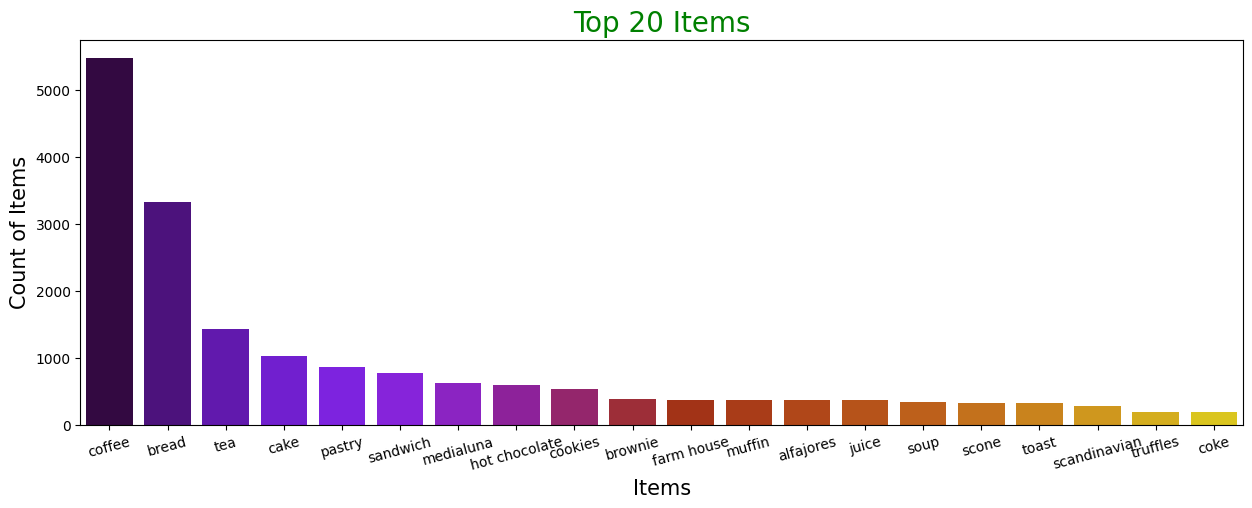

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x= dataset.Item.value_counts().head(20).index, y= dataset.Item.value_counts().head(20).values, palette='gnuplot')
plt.xlabel('Items', size= 15)
plt.xticks(rotation=15)
plt.ylabel('Count of Items', size= 15)
plt.title('Top 20 Items', color= 'green', size=20)
plt.show()

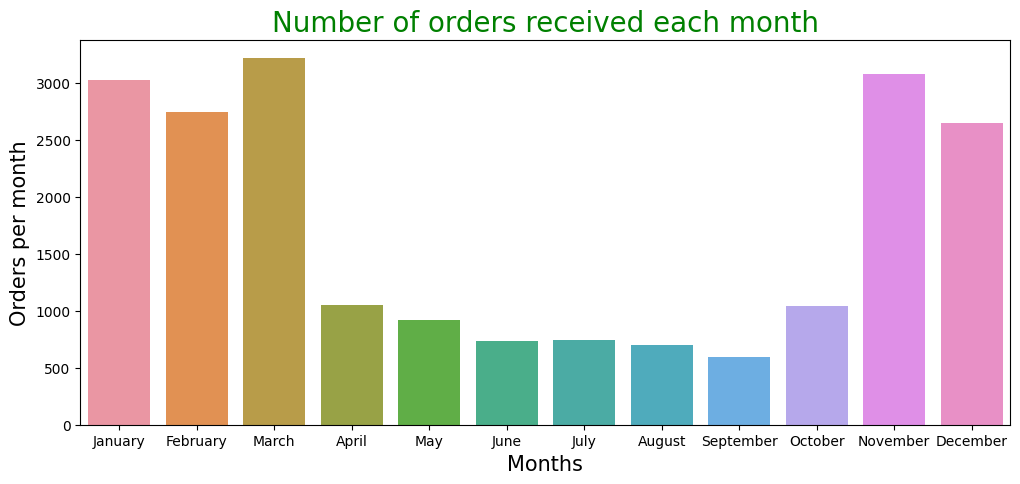

In [9]:
monthTrn= dataset.groupby('month')['Transaction'].count().reset_index()
monthTrn.loc[:, 'monthorder']= [4,8,12,2,1,7,6,3,5,11,10,9]
monthTrn.sort_values("monthorder", inplace= True)

plt.figure(figsize=(12,5))
sns.barplot(data = monthTrn, x = "month", y = "Transaction")
plt.xlabel('Months', size = 15)
plt.ylabel('Orders per month', size = 15)
plt.title('Number of orders received each month', color = 'green', size = 20)
plt.show()

Mais transações estão nos meses de Março, Novembro, Janeiro, Fervereiro e Dezembro

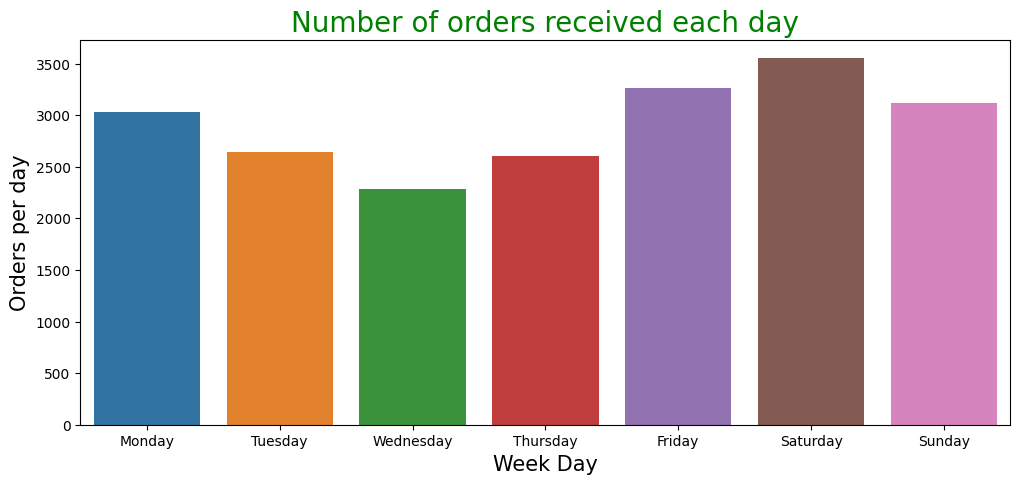

In [10]:
weekTrn= dataset.groupby('weekday')['Transaction'].count().reset_index()
weekTrn.loc[:, 'weekorder']= [4,0,5,6,3,1,2]
weekTrn.sort_values("weekorder", inplace= True)

plt.figure(figsize=(12,5))
sns.barplot(data = weekTrn, x = "weekday", y = "Transaction")
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'green', size = 20)
plt.show()

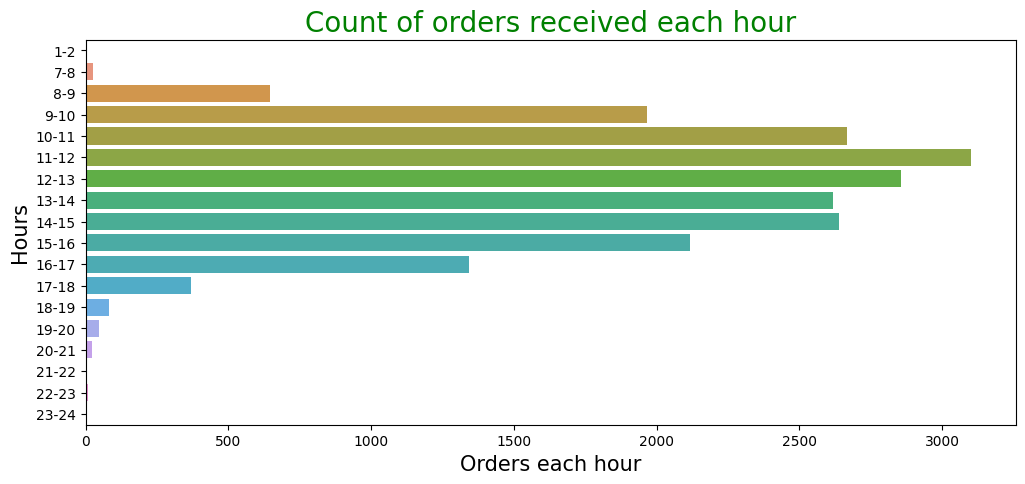

In [11]:
hourTran=  dataset.groupby('hour')['Transaction'].count().reset_index()
hourTran.loc[:,"hourorder"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
hourTran.sort_values("hourorder",inplace=True)

plt.figure(figsize=(12,5))
sns.barplot(data = hourTran, x = "Transaction", y = "hour")
plt.ylabel('Hours', size = 15)
plt.xlabel('Orders each hour', size = 15)
plt.title('Count of orders received each hour', color = 'green', size = 20)
plt.show()

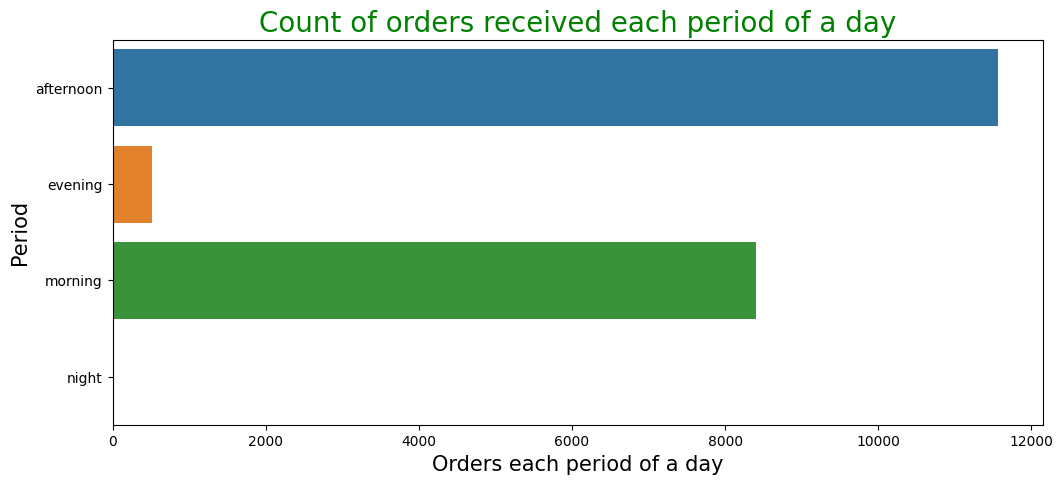

In [12]:
dayTran= dataset.groupby('period_day')['Transaction'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=dayTran, x= 'Transaction', y='period_day')
plt.ylabel('Period', size = 15)
plt.xlabel('Orders each period of a day', size = 15)
plt.title('Count of orders received each period of a day', color = 'green', size = 20)
plt.show()

In [15]:
dates= dataset.groupby('date')['Transaction'].count().reset_index()
dates= dates[dates['Transaction']>=200].sort_values('date').reset_index(drop=True)
dates=  pd.merge(dates, dataset[['date', 'weekday']], on= 'date', how='inner')
dates.drop_duplicates(inplace=True)

dates

,date,Transaction,weekday
0,2016-05-11,275,Wednesday
275,2016-11-19,209,Saturday
484,2016-12-11,221,Sunday
705,2017-01-28,237,Saturday
942,2017-02-18,227,Saturday
1169,2017-03-25,246,Saturday
1415,2017-04-02,292,Sunday
1707,2017-04-03,257,Monday
1964,2017-08-04,205,Friday
2169,2017-11-03,203,Friday


A maioria das transações são feitas no final de semana, como visto no gráfico

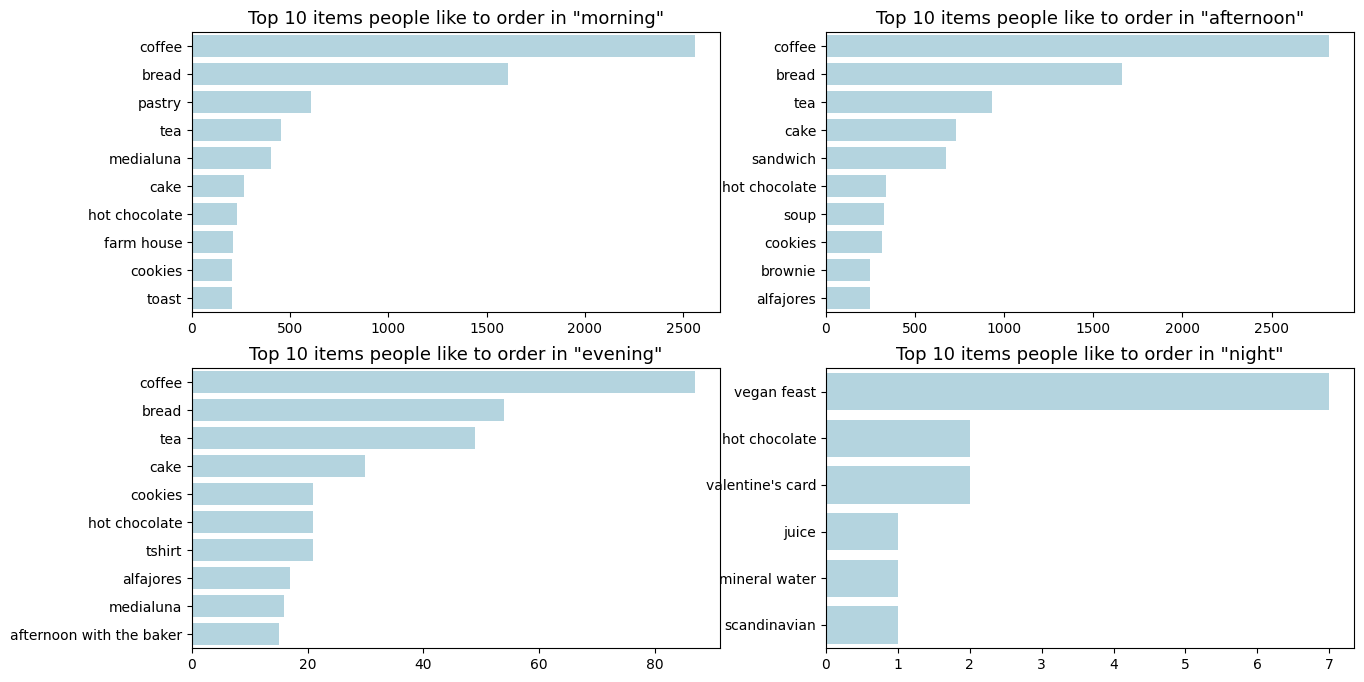

In [18]:
data= dataset.groupby(['period_day', 'Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'],ascending=False)
day= ['morning','afternoon','evening','night']

plt.figure(figsize=(15,8))
for i, j in enumerate(day):
    plt.subplot(2, 2, i+1)
    df1= data[data.period_day==j].head(10)
    sns.barplot(data= df1, y= df1.Item, x= df1.Transaction, color='lightblue')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items people like to order in "{}"'.format(j), size=13)

plt.show()

Apriori Algorithm

In [32]:
dataset_tr= dataset.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
basket= dataset_tr.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket.head()

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = basket.applymap(encode)
my_basket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items= apriori(my_basket_sets, min_support=0.01, use_colnames=True)
frequent_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(coffee, bread, cake)"
59,0.011199,"(pastry, coffee, bread)"


In [34]:
rules= association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('confidence', ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [39]:
confidence= [f"{conf*100:.2f}" + "%" for conf in rules['confidence']]
rules['confidence']= confidence

In [41]:
minimalist_rules= rules[['antecedents', 'consequents', 'confidence']]
minimalist_rules

,antecedents,consequents,confidence
31,(toast),(coffee),70.44%
29,(spanish brunch),(coffee),59.88%
18,(medialuna),(coffee),56.92%
22,(pastry),(coffee),55.21%
0,(alfajores),(coffee),54.07%
17,(juice),(coffee),53.42%
24,(sandwich),(coffee),53.24%
7,(cake),(coffee),52.70%
27,(scone),(coffee),52.29%
12,(cookies),(coffee),51.84%
